In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1094,2020-07-23,United Kingdom,296706.0,296377.0,45493.0,45501.0,329.0,-8.0
1095,2020-07-23,Germany,203367.0,203368.0,9107.0,9101.0,-1.0,6.0
1096,2020-07-23,Iran,282178.0,281413.0,14818.0,14853.0,765.0,-35.0
1097,2020-07-23,Turkey,222394.0,222402.0,5542.0,5545.0,-8.0,-3.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  3321.626023657871
RMSE =  9123.621677697043


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  292.59326660600544
RMSE =  685.2447342146314


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  17810.85849056604
RMSE =  25730.396729153297
-- World performances for deaths --
MAE =  1545.4716981132076
RMSE =  1880.1307913155485


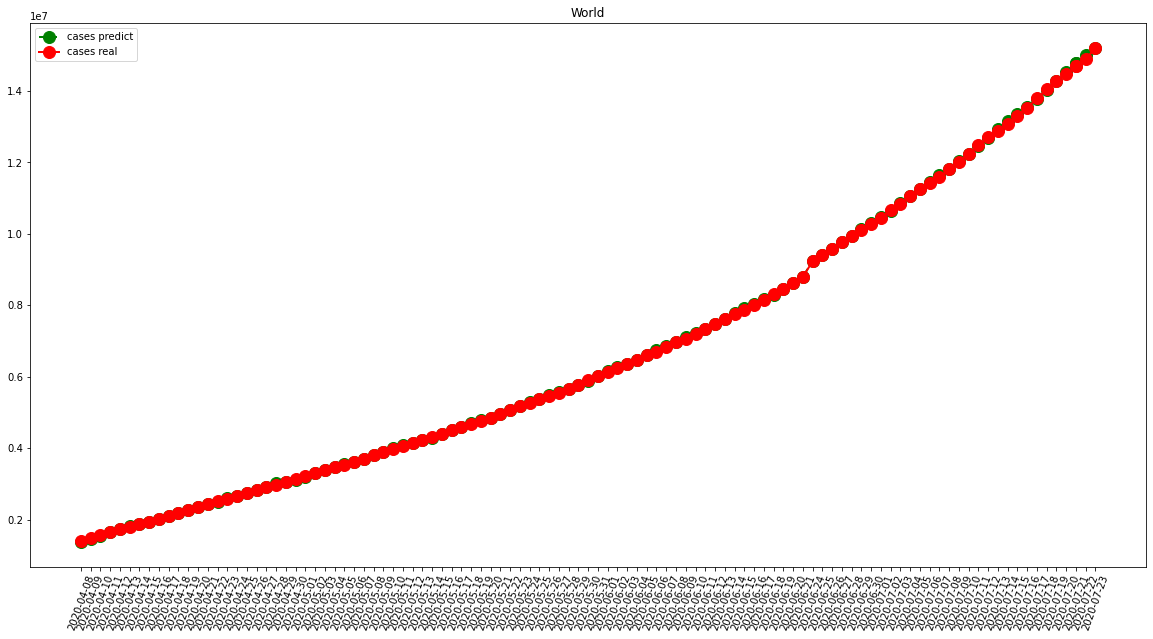

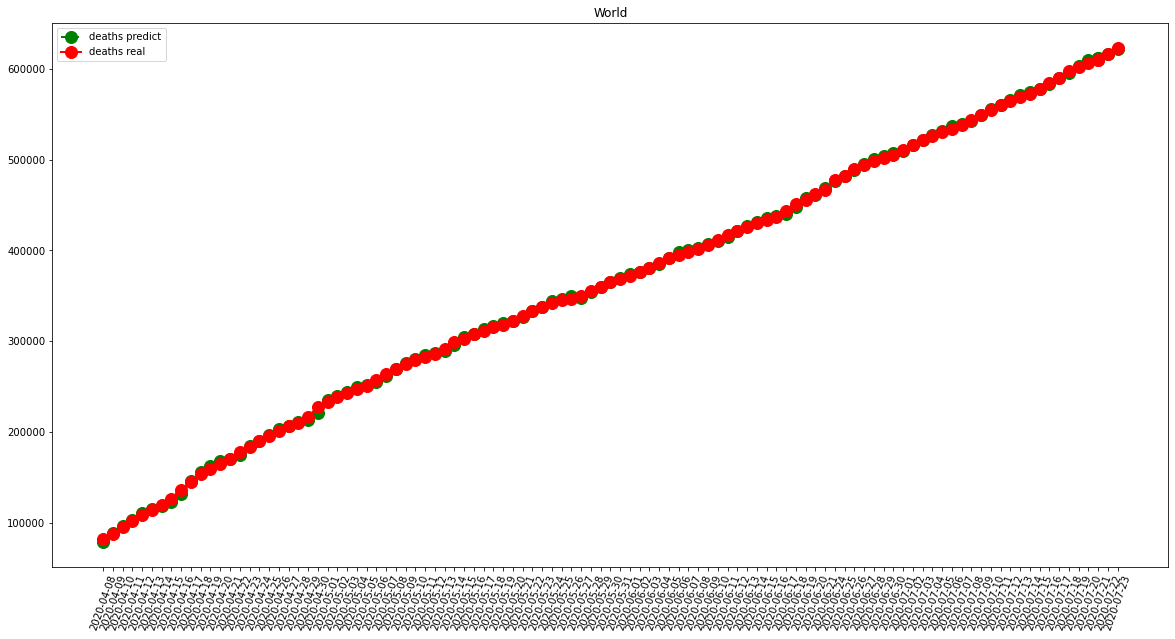

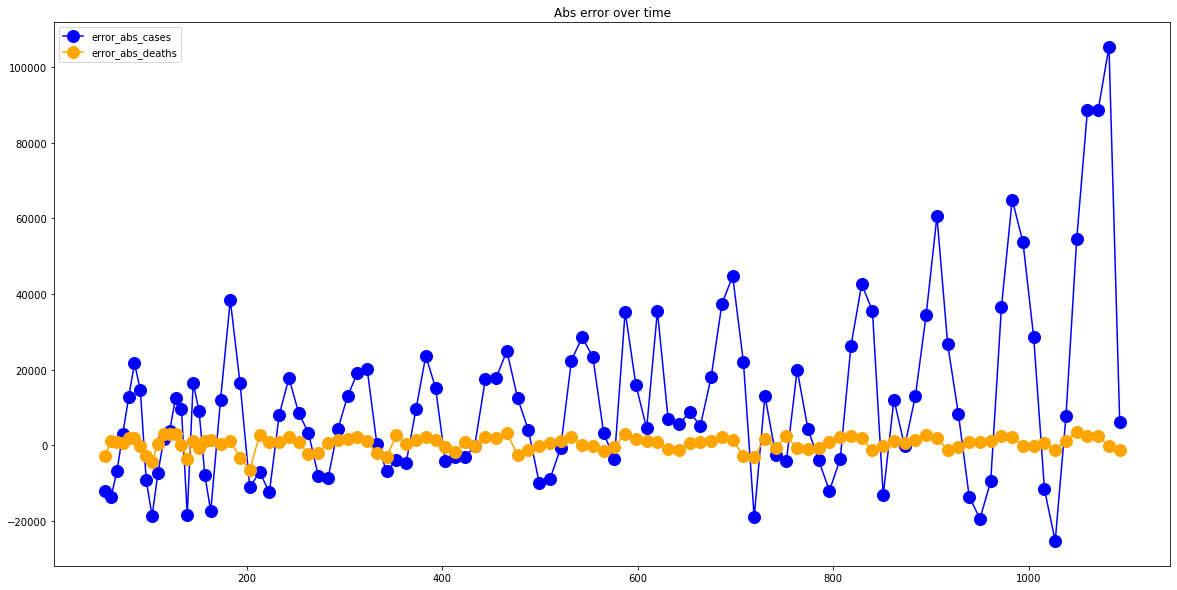

In [7]:
visShow("World")

-- France performances for cases --
MAE =  851.448275862069
RMSE =  1384.07867401462
-- France performances for deaths --
MAE =  154.97413793103448
RMSE =  311.1610764816856


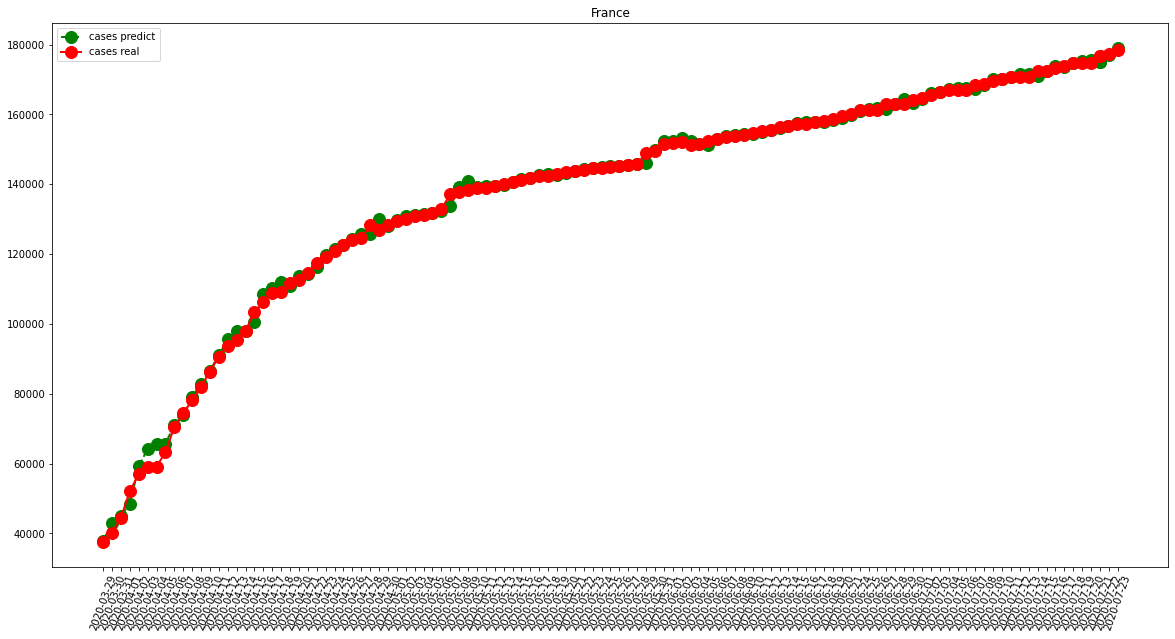

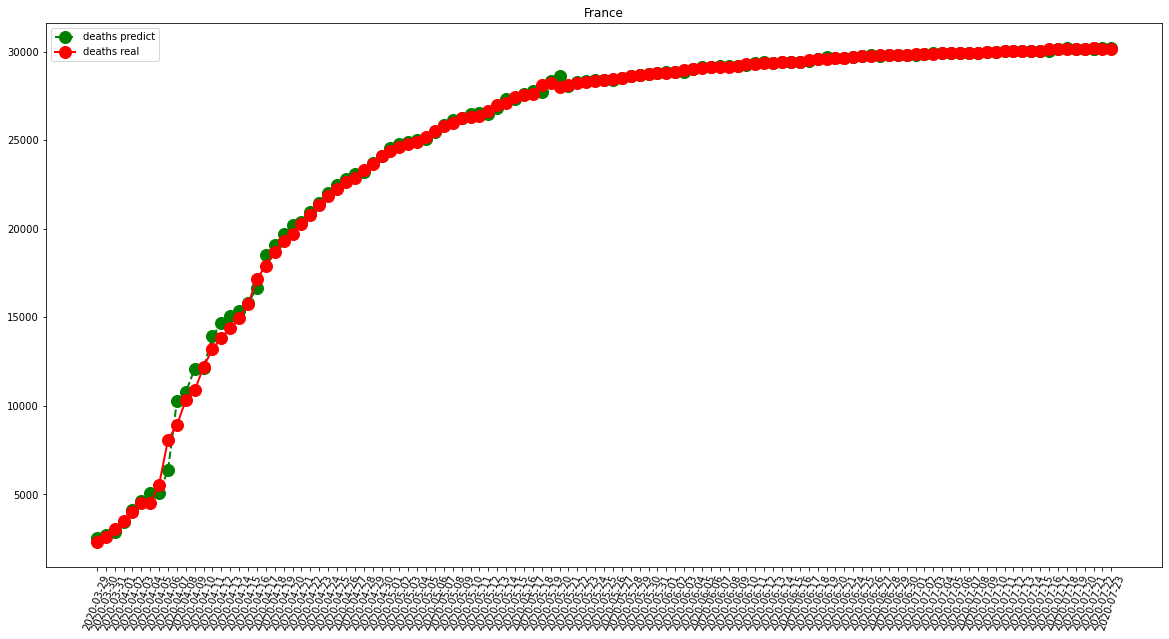

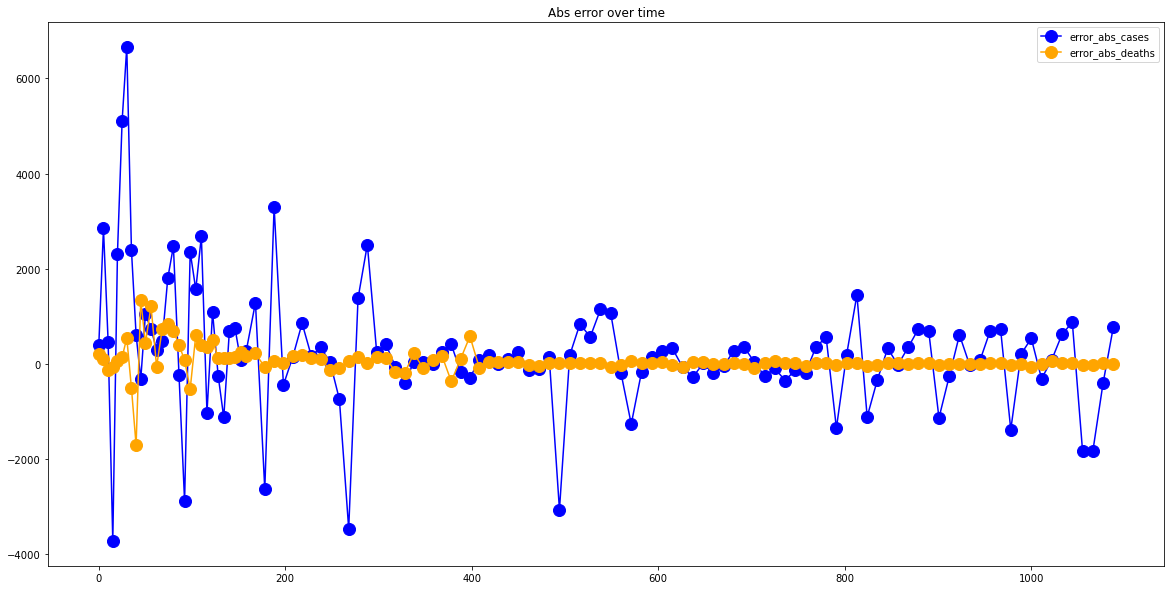

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  338.4396551724138
RMSE =  506.4411069686052
-- Italy performances for deaths --
MAE =  87.34482758620689
RMSE =  274.73595474125005


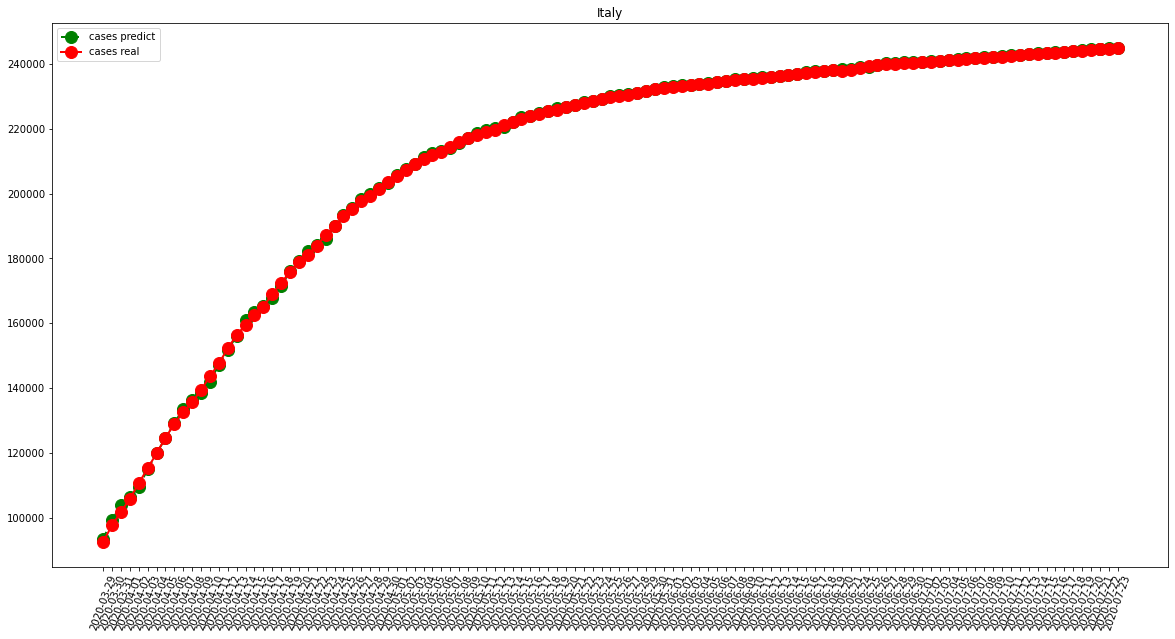

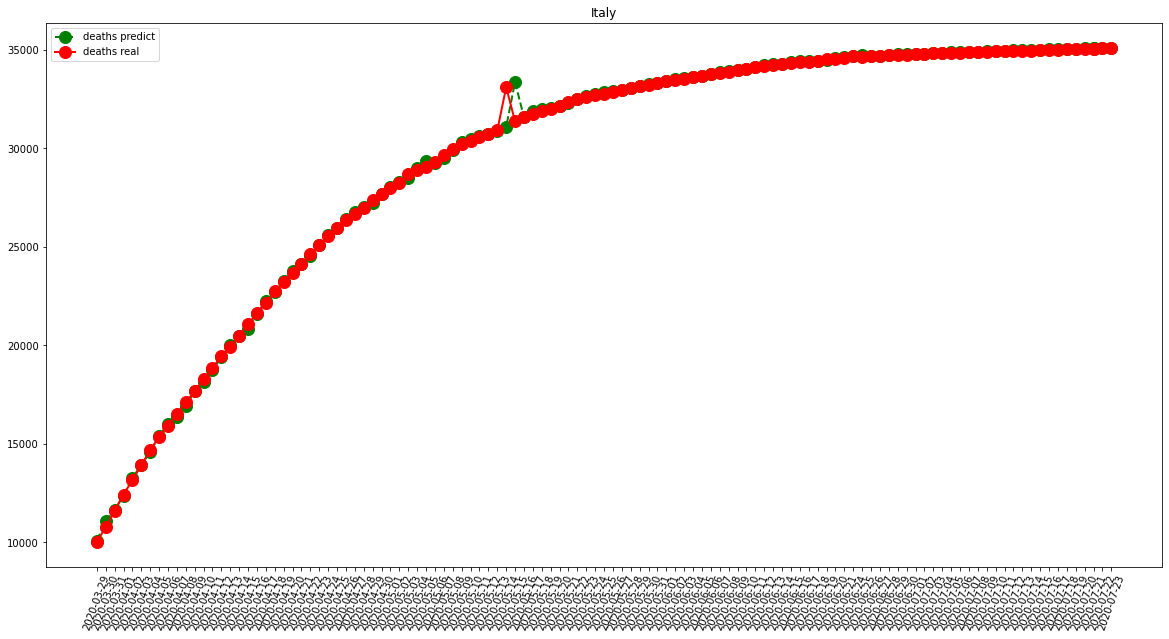

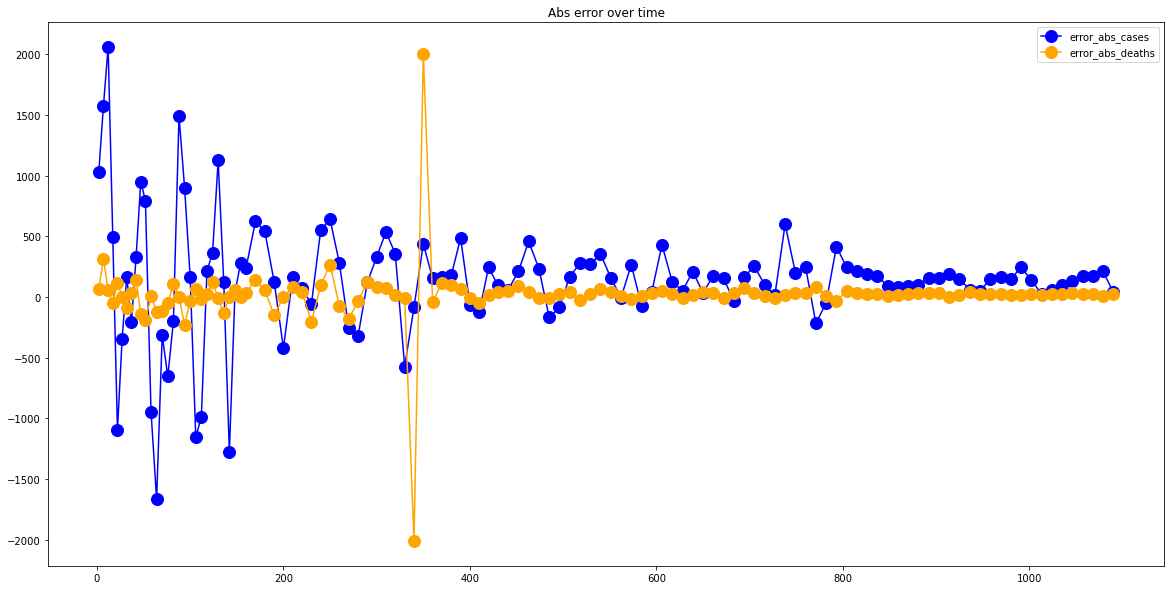

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  934.8793103448276
RMSE =  2033.4651036067
-- Spain performances for deaths --
MAE =  158.05172413793105
RMSE =  376.8806863241176


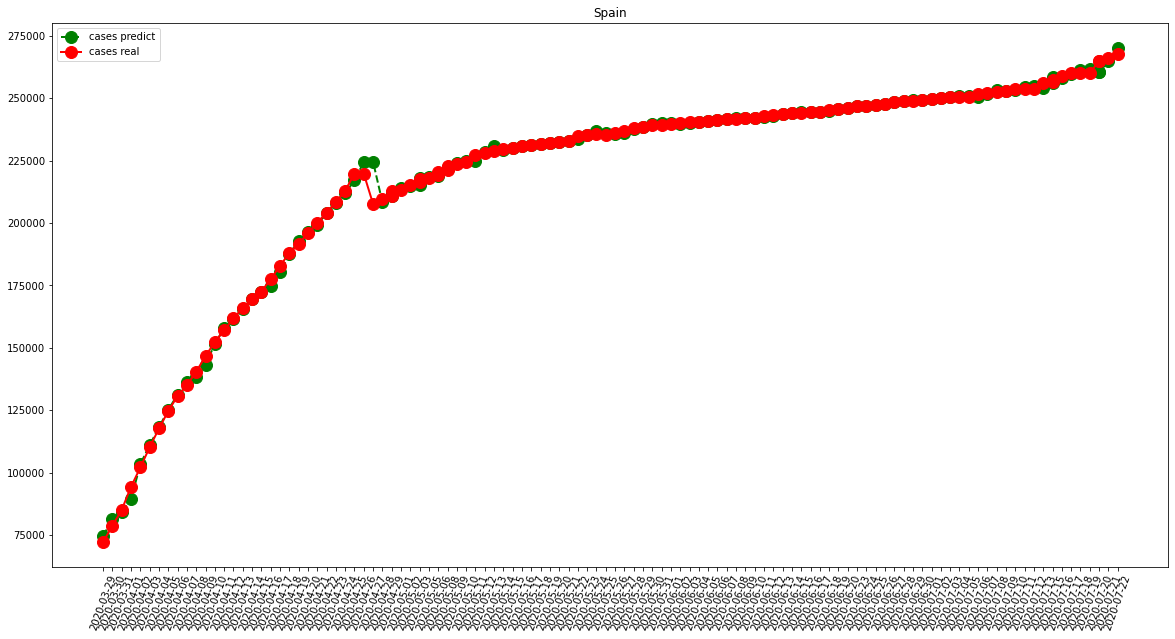

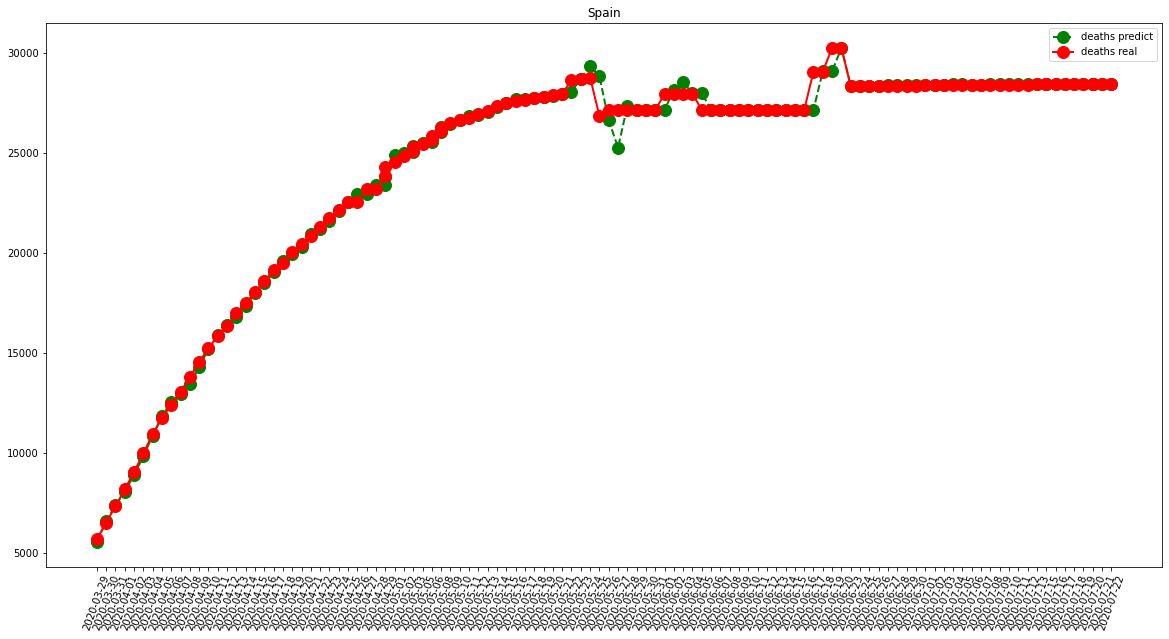

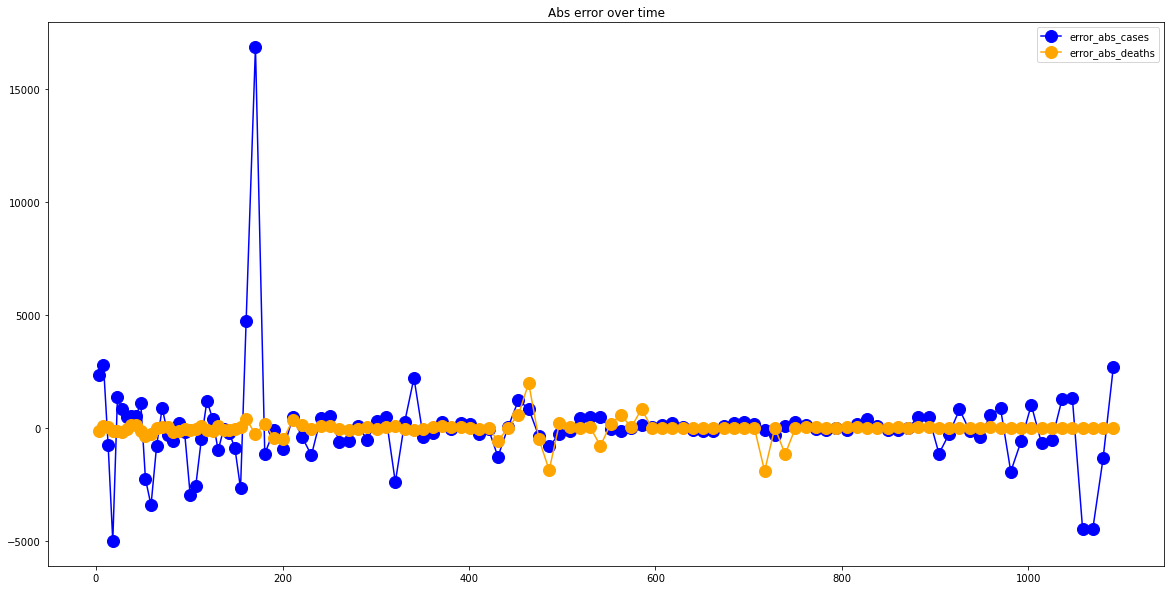

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  5535.224137931034
RMSE =  7458.706088675259
-- United States performances for deaths --
MAE =  513.0948275862069
RMSE =  741.729752579785


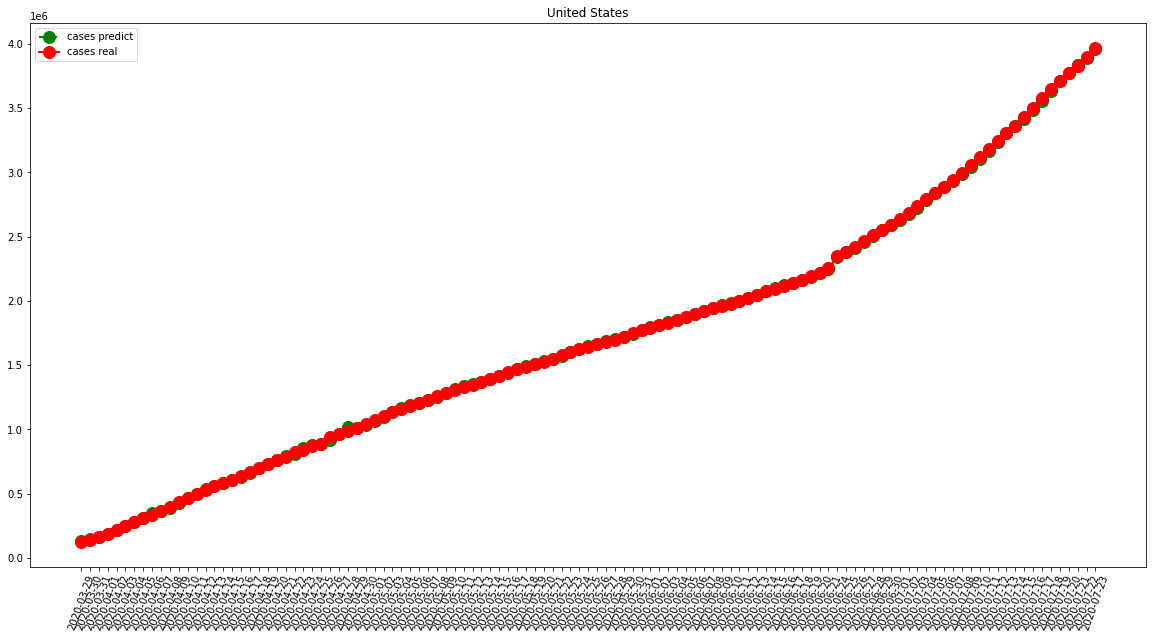

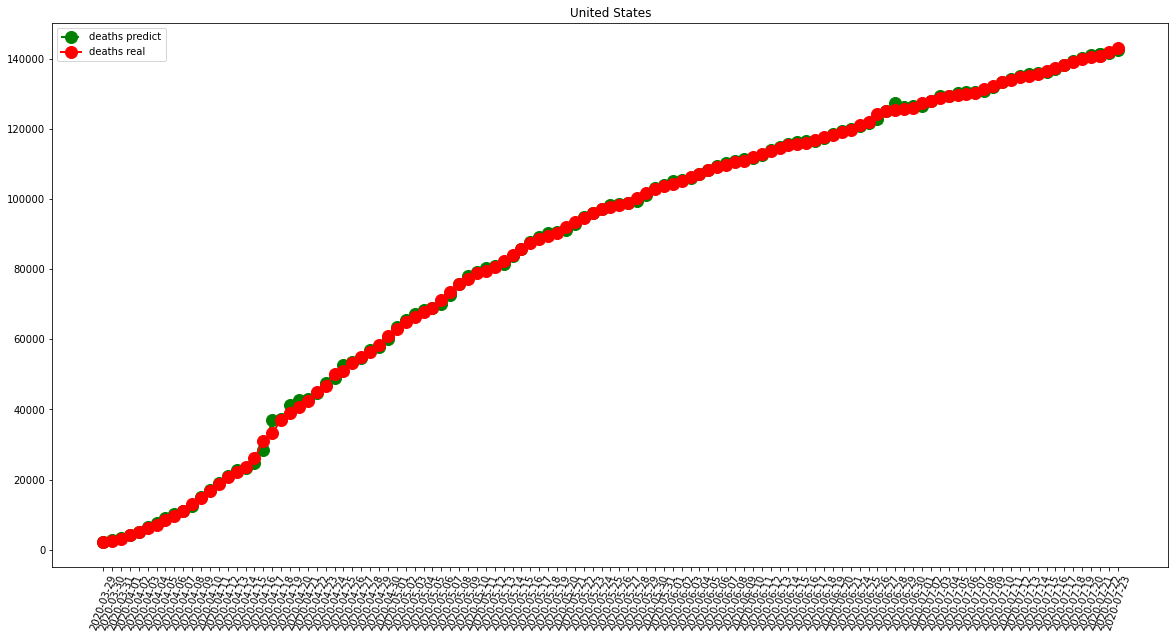

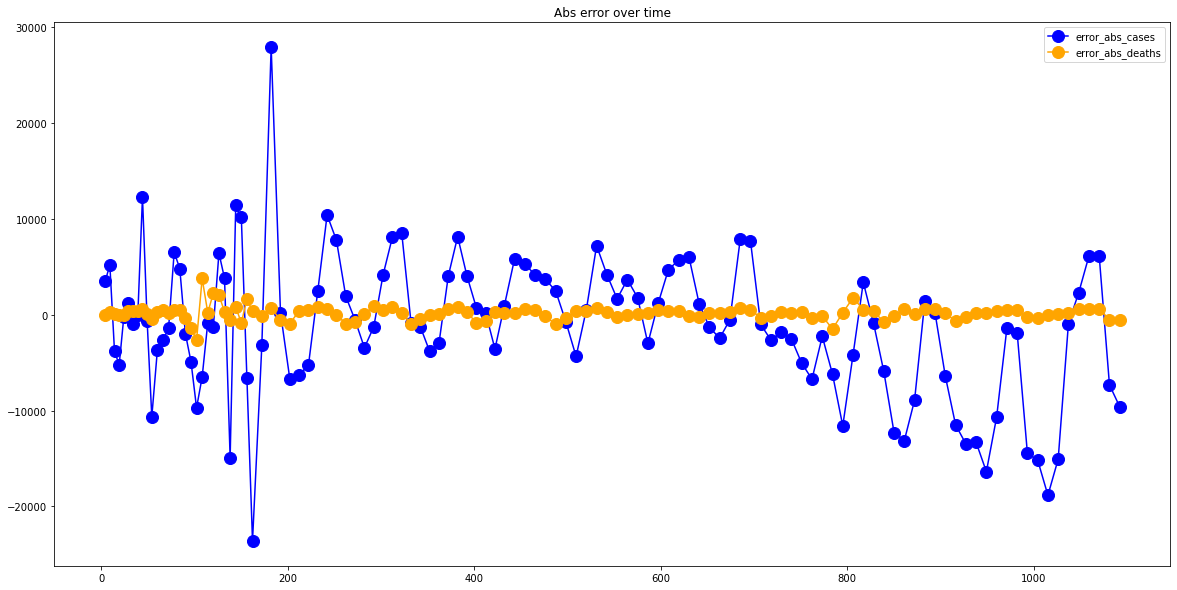

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  80.25
RMSE =  109.92187664663136
-- China performances for deaths --
MAE =  34.275862068965516
RMSE =  145.7585982558739


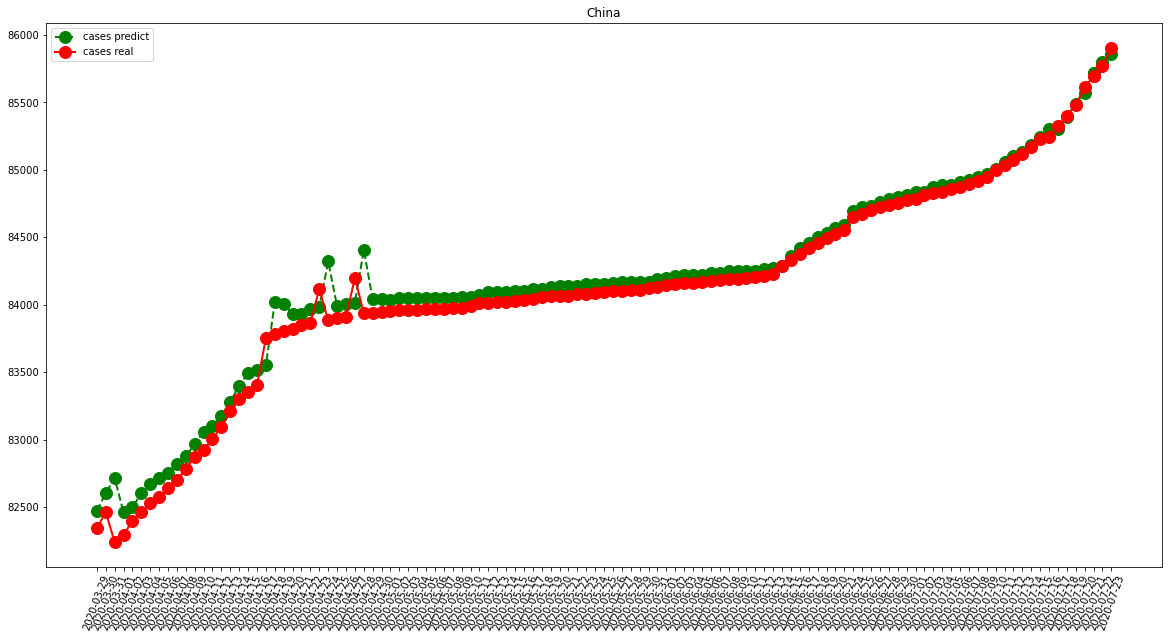

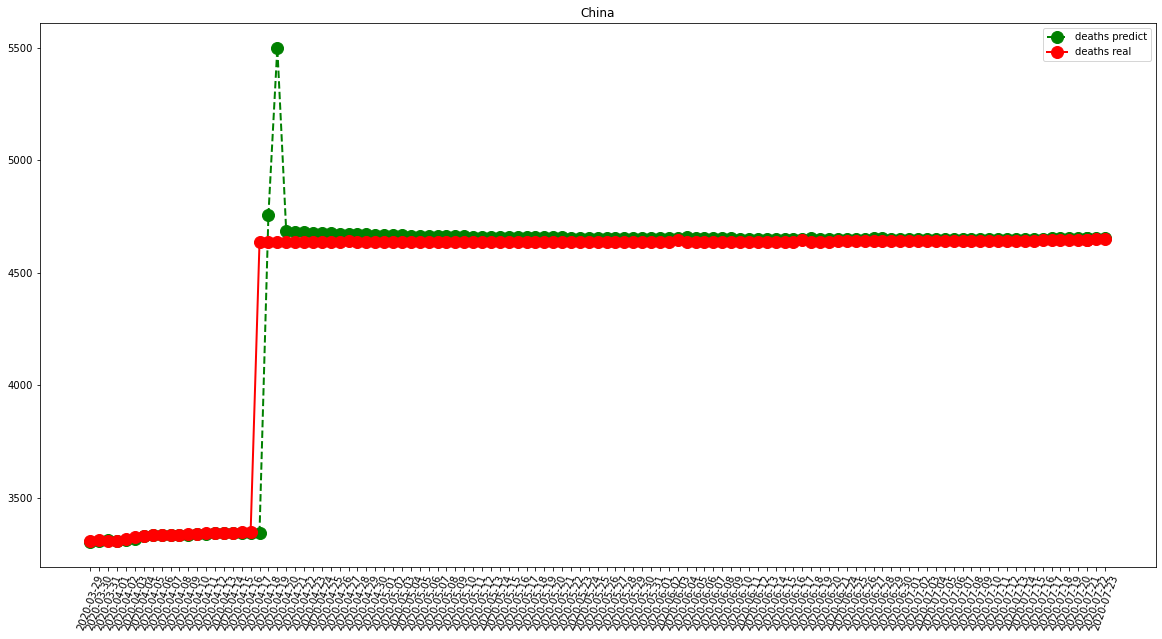

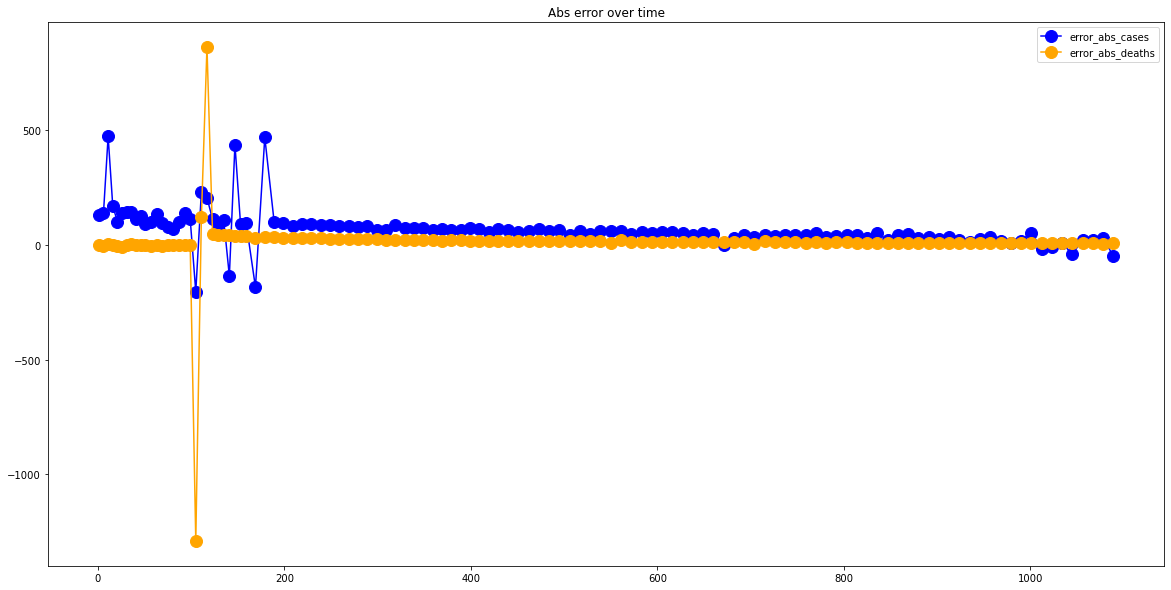

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1373.965909090909
RMSE =  4448.476706847372
-- United Kingdom performances for deaths --
MAE =  212.4318181818182
RMSE =  522.6680460518286


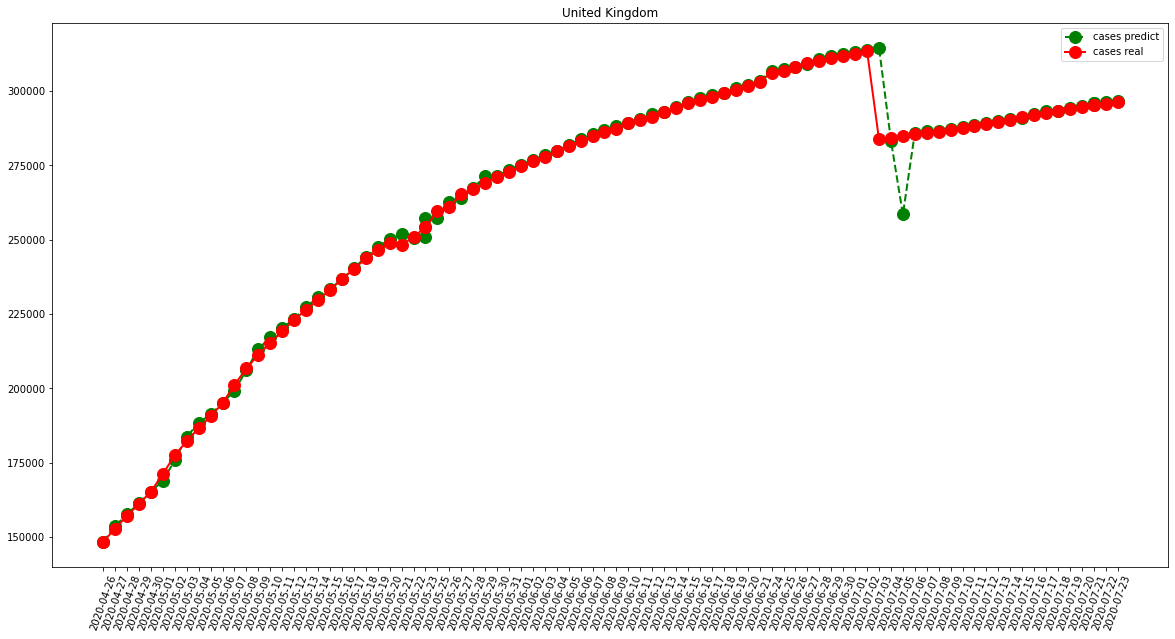

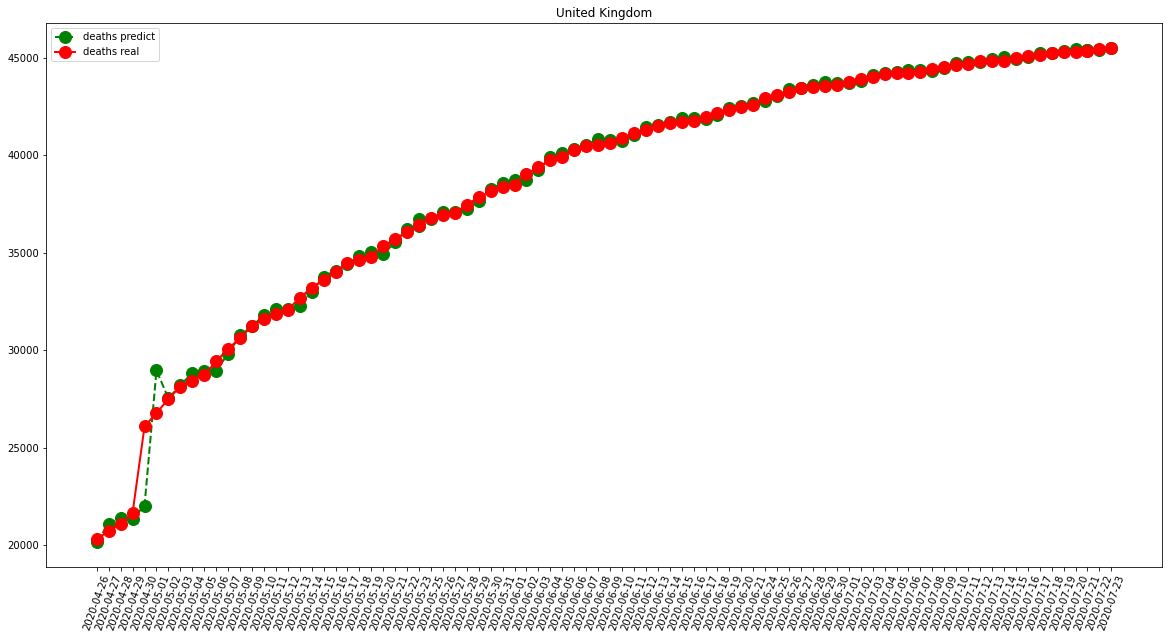

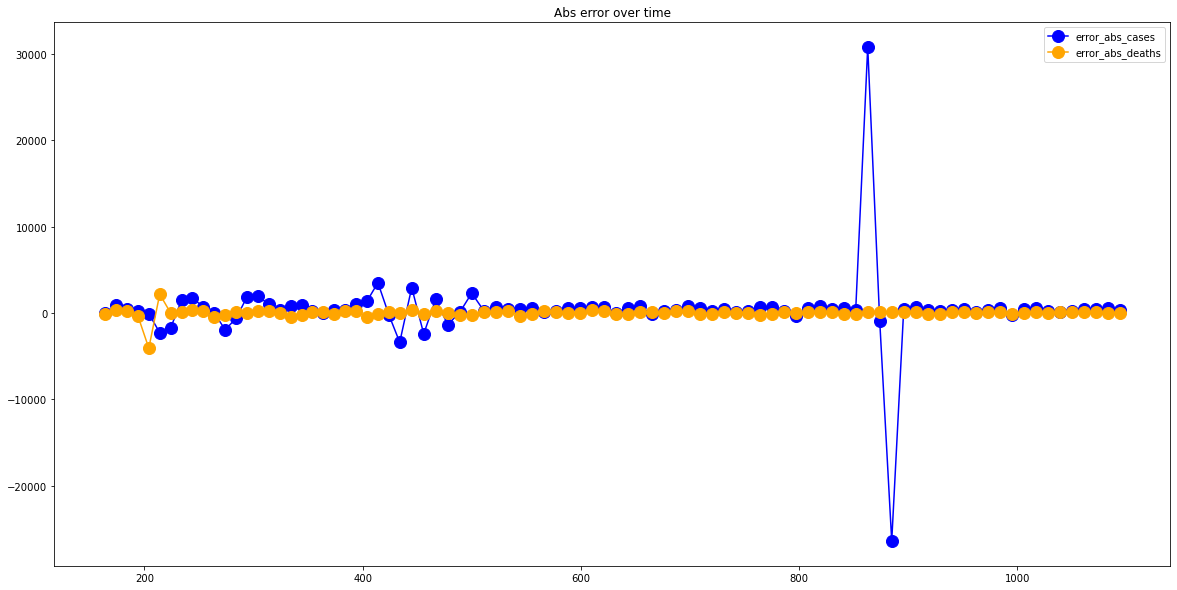

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  291.72727272727275
RMSE =  410.55126465411223
-- Germany performances for deaths --
MAE =  26.931818181818183
RMSE =  46.53468891834641


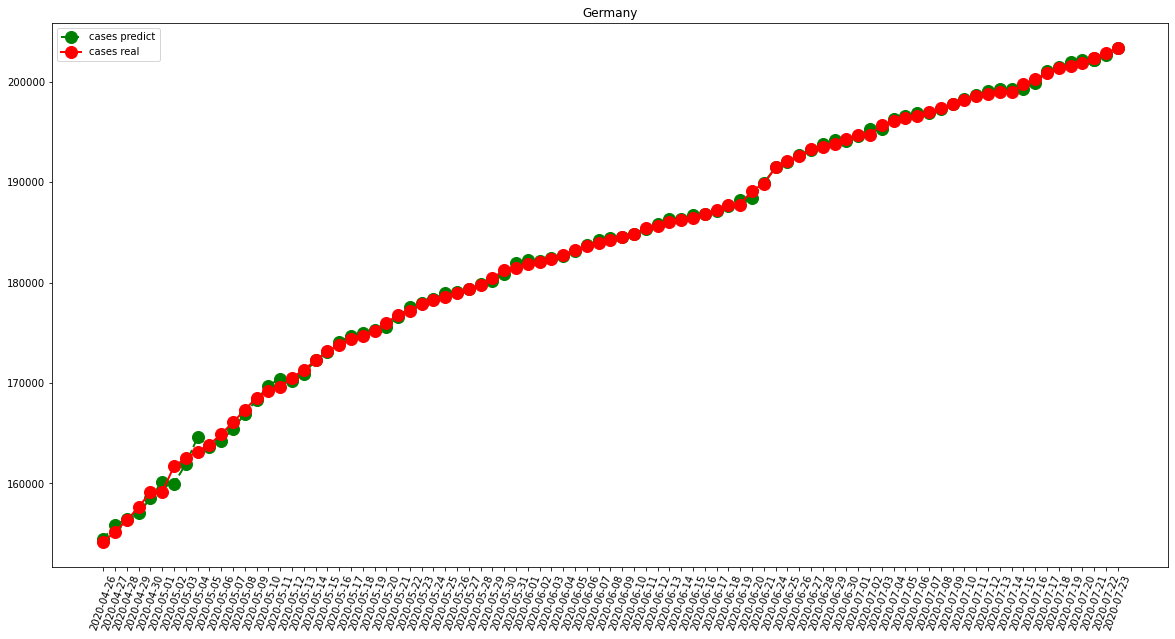

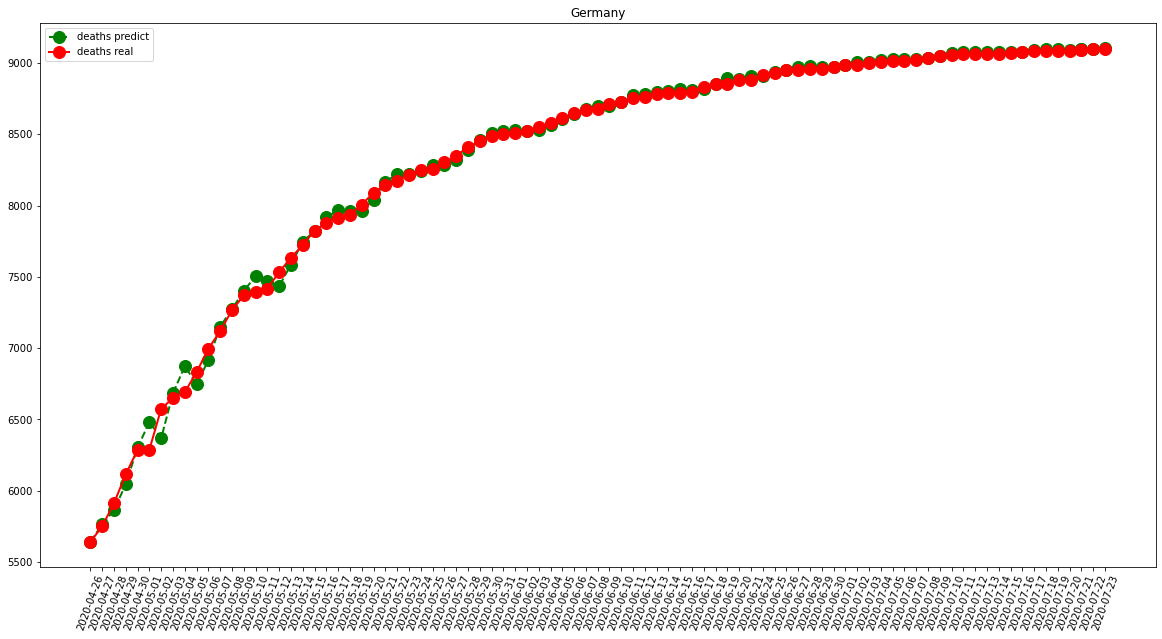

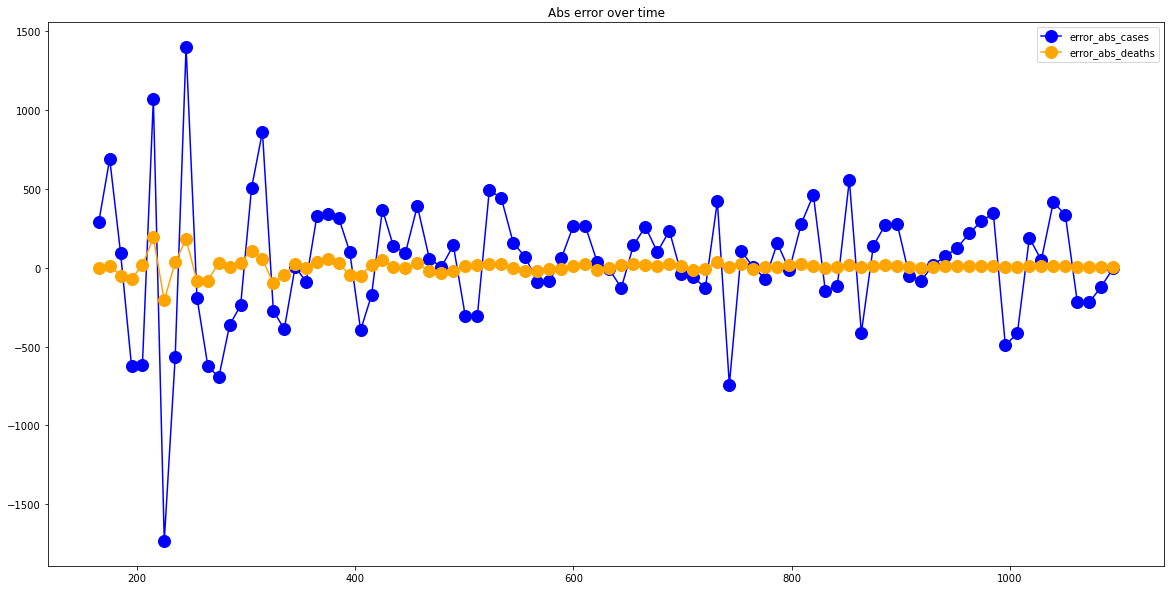

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  423.9431818181818
RMSE =  548.8238353722688
-- Iran performances for deaths --
MAE =  20.306818181818183
RMSE =  30.44947379751339


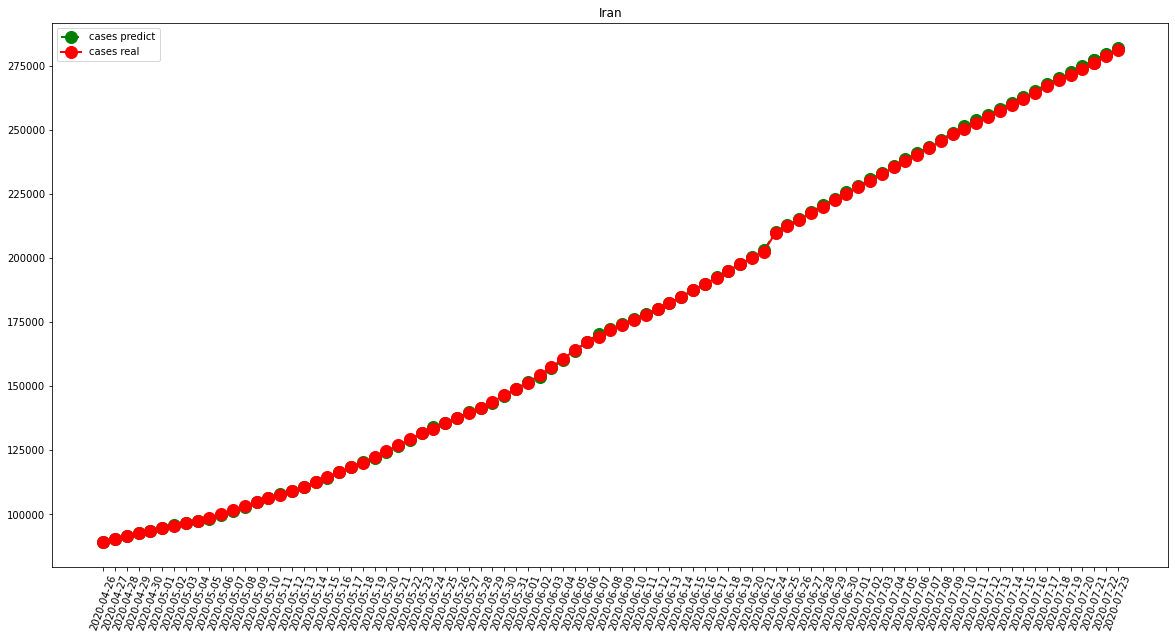

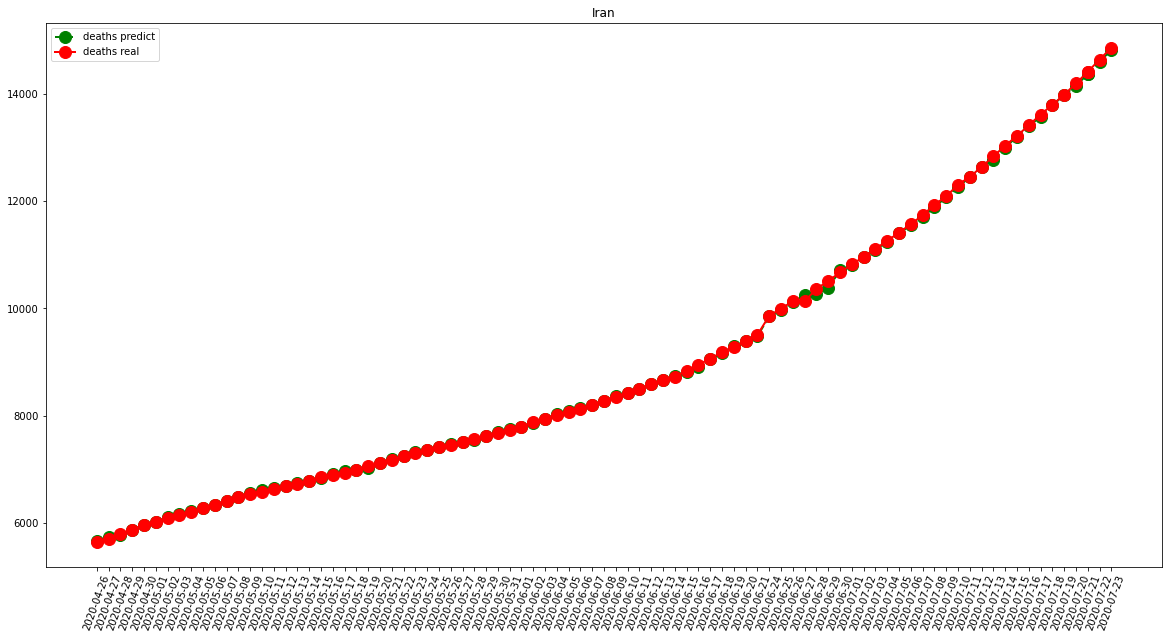

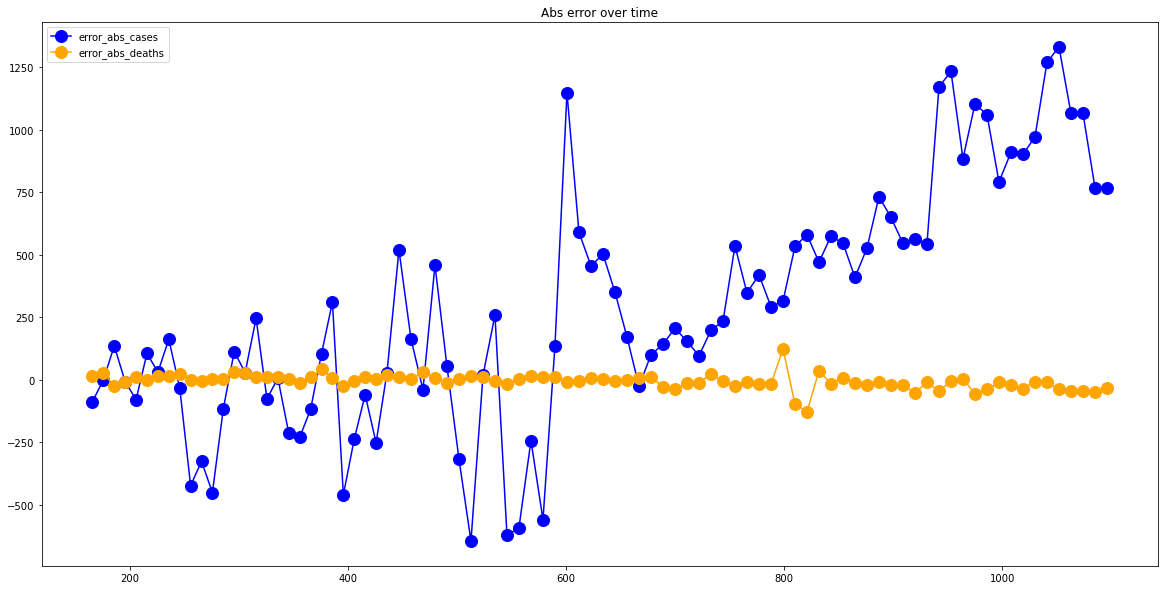

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  216.86363636363637
RMSE =  366.26111525174844
-- Turkey performances for deaths --
MAE =  21.295454545454547
RMSE =  108.20750268056109


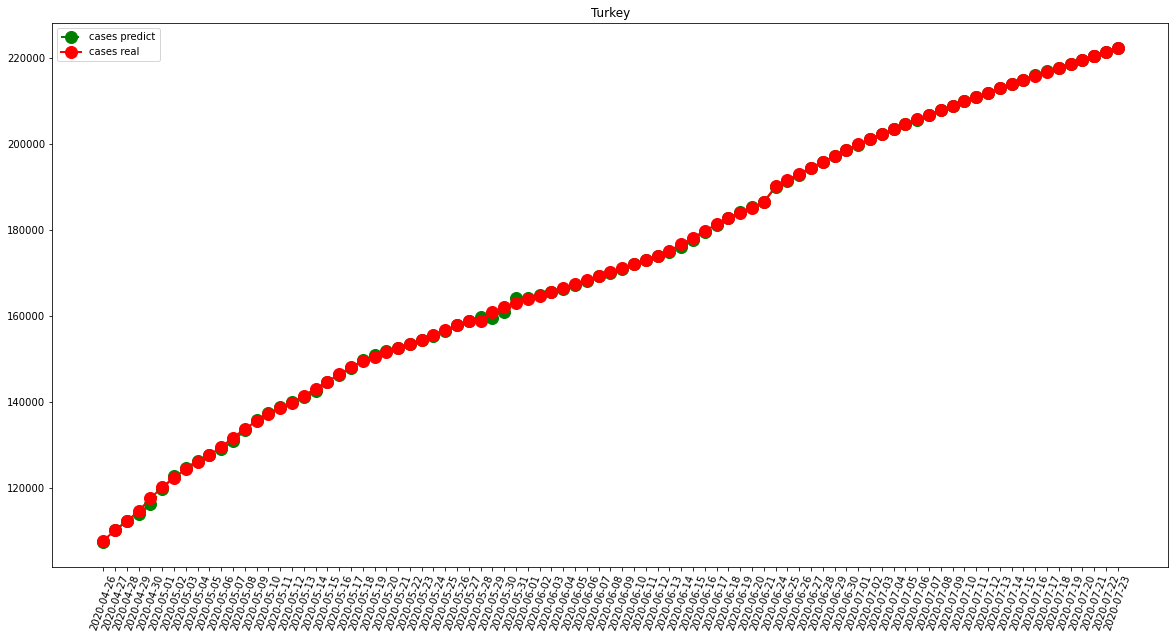

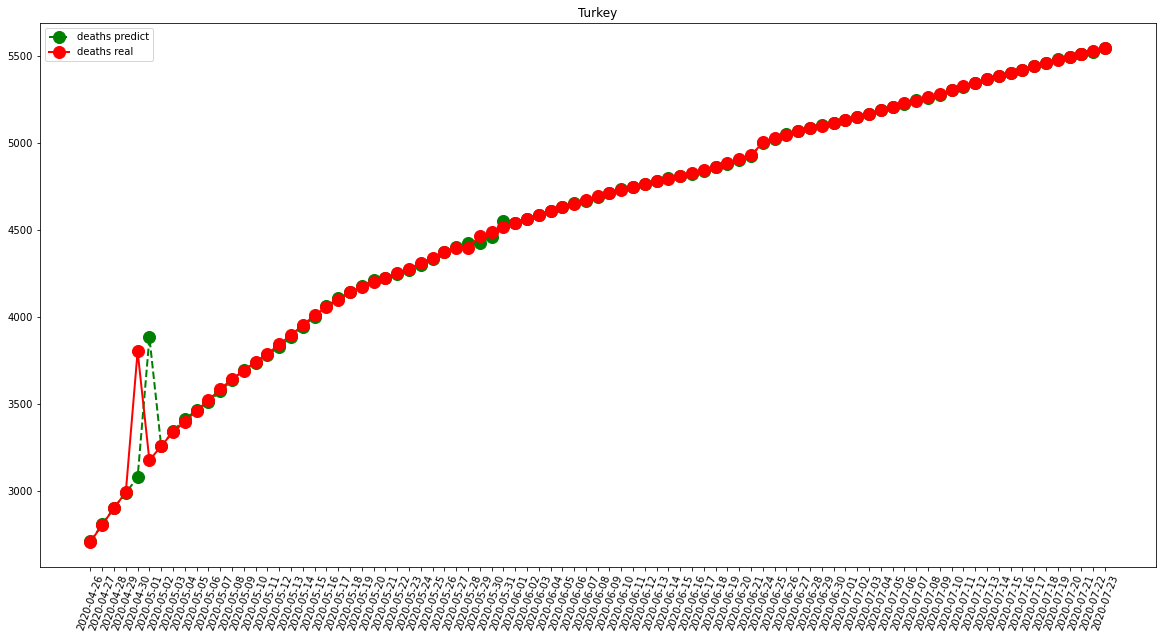

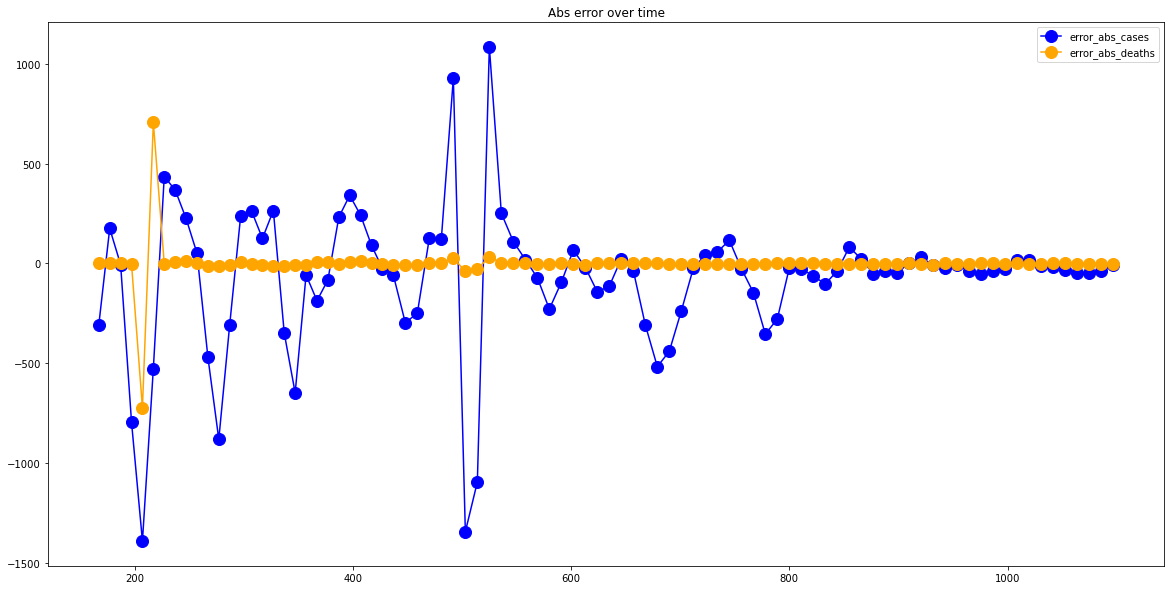

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  10847.147540983606
RMSE =  14213.063125513658
-- Brazil performances for deaths --
MAE =  378.3114754098361
RMSE =  466.21779544209295


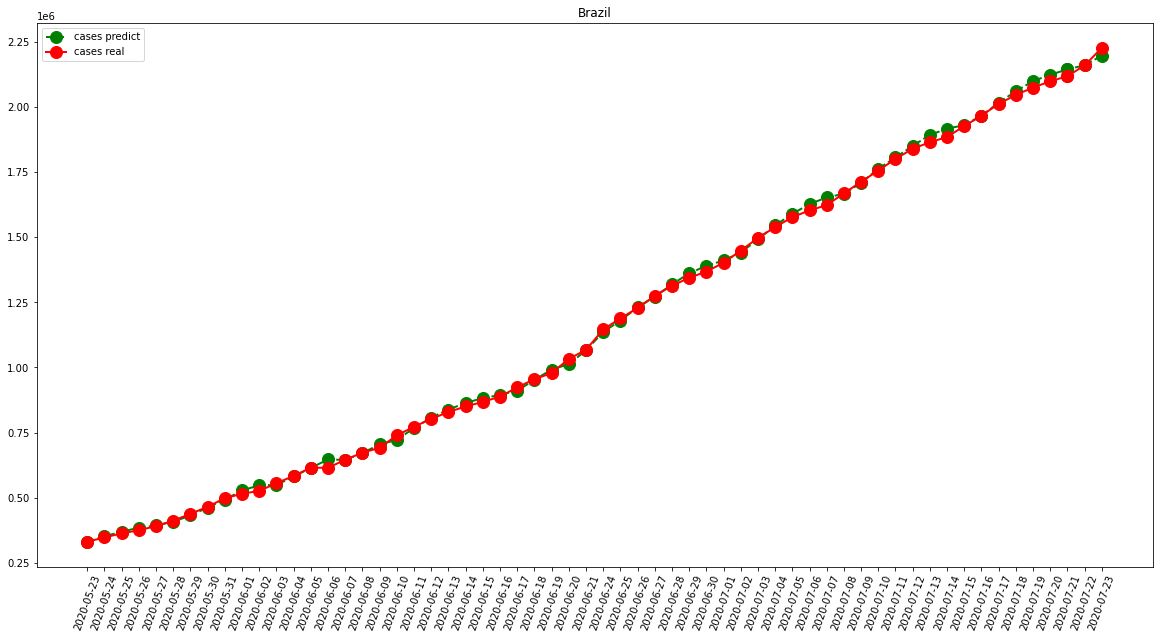

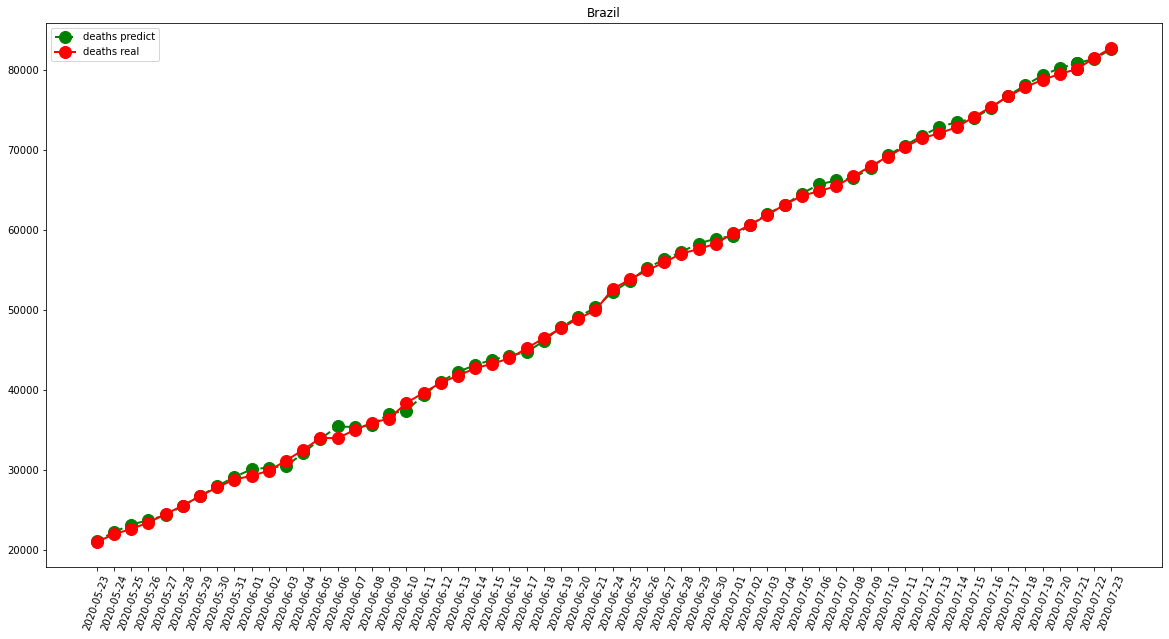

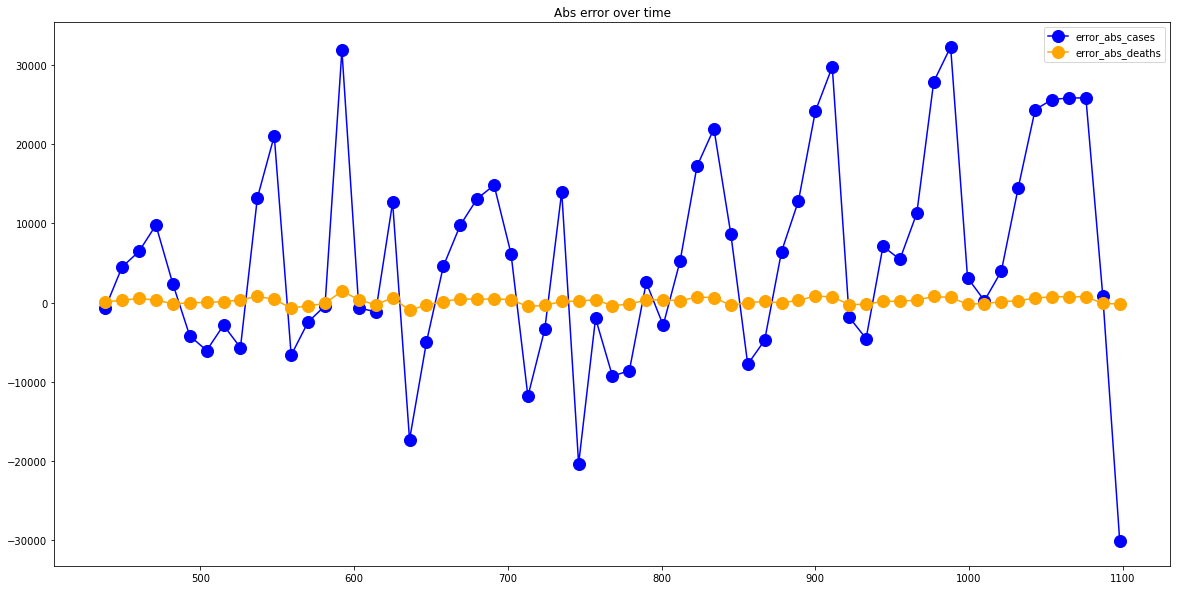

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)